In [ ]:
import cv2
from google.colab.patches import cv2_imshow   
import numpy as np
import requests

In [ ]:
# Downloading image
url = "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

167800

In [ ]:
image = cv2.imread('image.jpg')

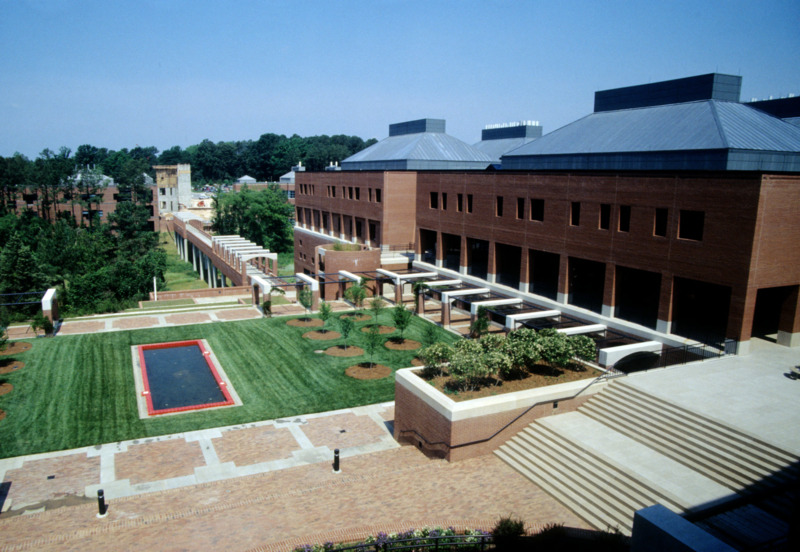

In [ ]:
cv2_imshow(image)

In [ ]:
image.shape

(552, 800, 3)

In [ ]:
# Canais BGR
print("Canal B: \n", image[:,:,0], '\n')
print("Canal G: \n", image[:,:,1], '\n')
print("Canal R: \n", image[:,:,2], '\n')

Canal B: 
 [[210 213 215 ... 181 180 178]
 [212 213 213 ... 178 177 178]
 [211 212 211 ... 175 175 175]
 ...
 [111 135 145 ...   0   0   0]
 [111 131 135 ...   0   0   0]
 [105 122 121 ...   0   0   0]] 

Canal G: 
 [[152 155 157 ... 115 115 113]
 [154 155 155 ... 114 113 113]
 [153 154 153 ... 114 114 114]
 ...
 [134 143 158 ...   0   0   0]
 [128 143 154 ...   0   0   0]
 [118 136 149 ...   0   0   0]] 

Canal R: 
 [[ 86  90  92 ...  50  47  45]
 [ 89  90  90 ...  49  48  45]
 [ 88  89  88 ...  48  48  48]
 ...
 [160 166 174 ...   0   0   0]
 [161 167 167 ...   0   0   0]
 [156 164 160 ...   0   0   0]] 



In [ ]:
# Redimesionar
image_resized = cv2.resize(image, (250, 200))

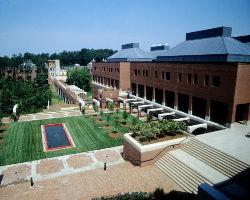

In [ ]:
cv2_imshow(image_resized)

In [ ]:
# Transformar para escala de cinza
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

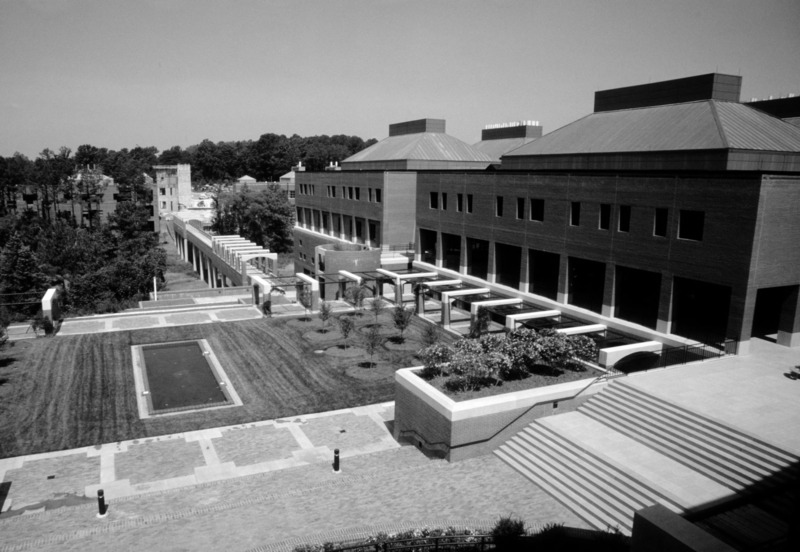

In [ ]:
cv2_imshow(image_gray)

In [ ]:
image_gray.shape

(552, 800)

In [ ]:
# Desenhando retangulos
# It takes in 5 arguments –

# Image
# Top-left corner co-ordinates
# Bottom-right corner co-ordinates
# Color (in BGR format)
# Line width

In [ ]:
output = image.copy()
rectangle = cv2.rectangle(output, (200, 200), (400, 400), (255, 0, 0), 2)

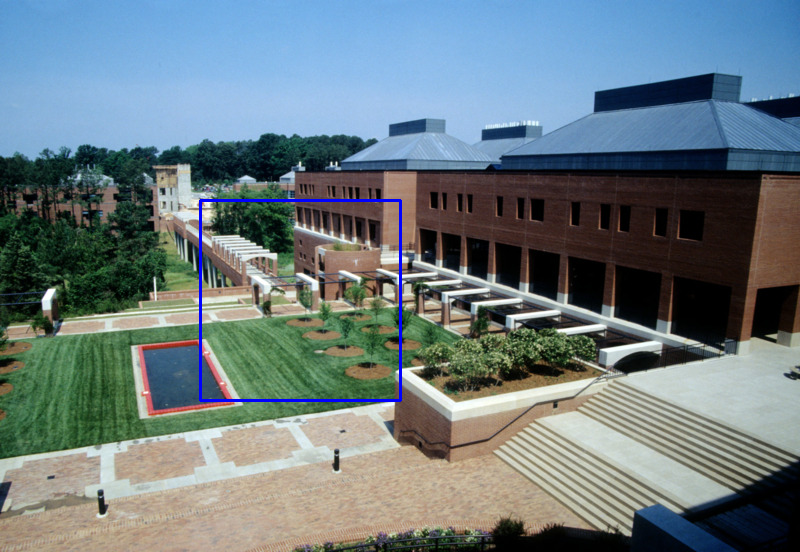

In [ ]:
cv2_imshow(rectangle)

In [ ]:
# Text in image

# It takes in 7 arguments –

# Image
# Text to be displayed
# Bottom-left corner co-ordinates, from where the text should start
# Font
# Font size
# Color (BGR format)
# Line width



# Copying the original image
output = image.copy()
  
# Adding the text using putText() function
text = cv2.putText(output, 'OpenCV Demo', (100, 50), 
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)

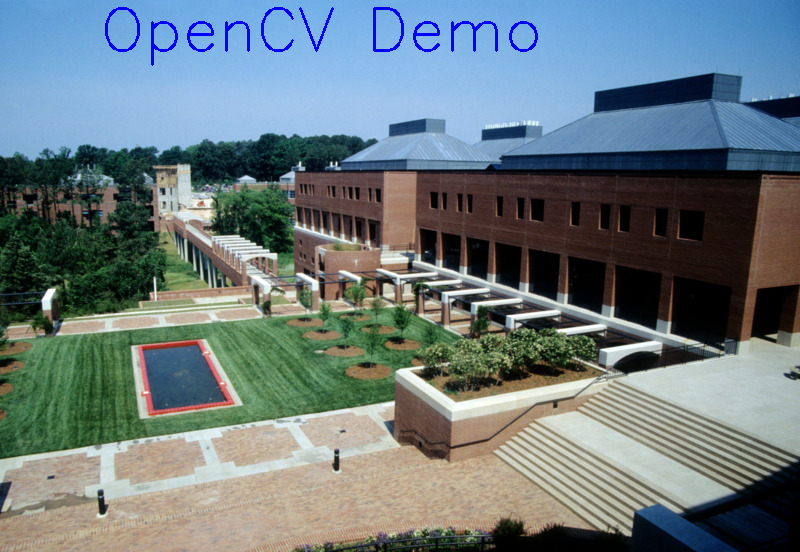

In [ ]:
cv2_imshow(text)

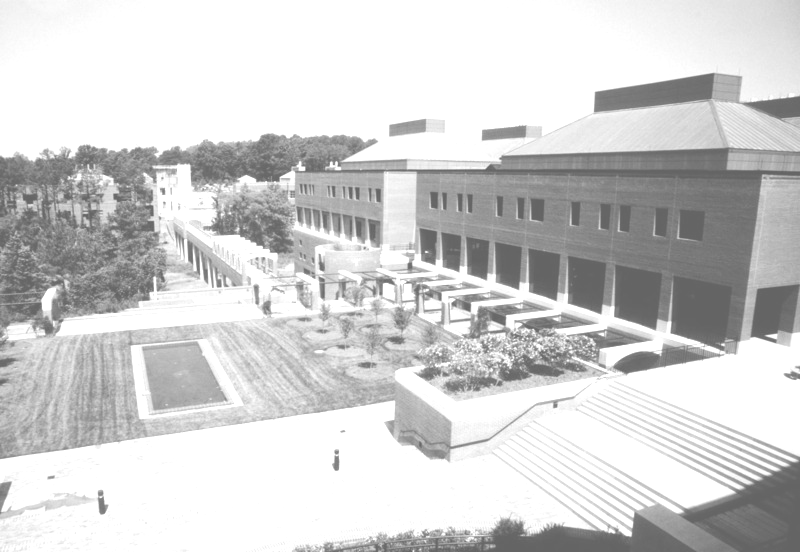

In [ ]:
## Deixar imagem mais clara

cv2_imshow(cv2.add(image_gray, 100))

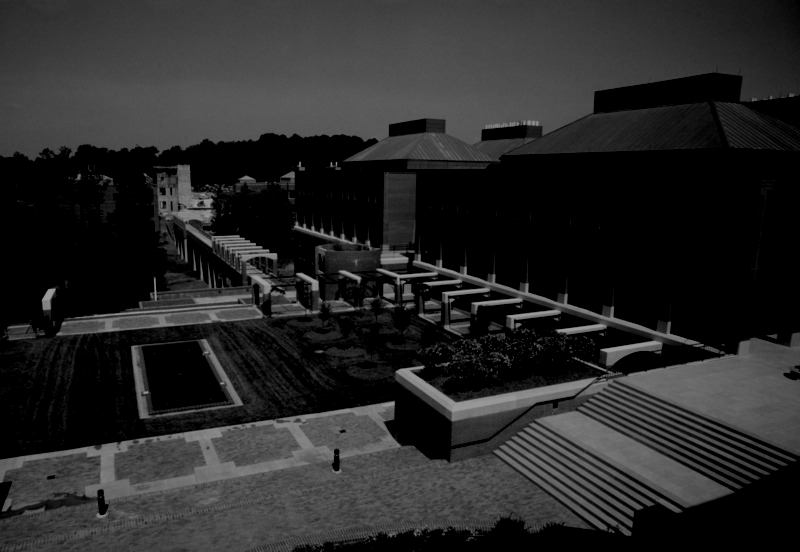

In [ ]:
## Deixar imagem mais escura
cv2_imshow(cv2.subtract(image_gray, 100))

In [ ]:
## Filtros

In [ ]:
## Filtro realça diferença entre pixeís adjacentes
#Kernel, filtro, máscara, template
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])
result = cv2.filter2D(src=image_gray, ddepth=-1, kernel=kernel_sharpen)

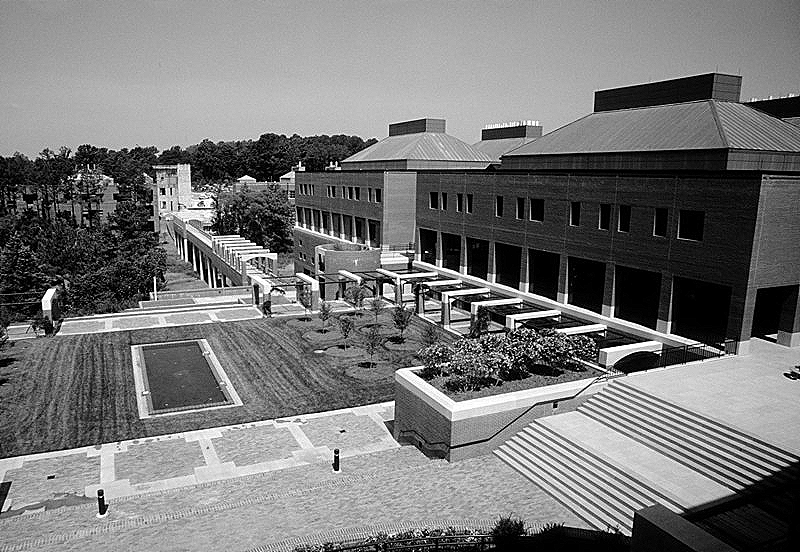

In [ ]:
cv2_imshow(result)

In [ ]:
# Realça sinais pequenos e bordas
kernel_passa_alta = np.array([[-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])
result = cv2.filter2D(src=image_gray, ddepth=-1, kernel=kernel_passa_alta)


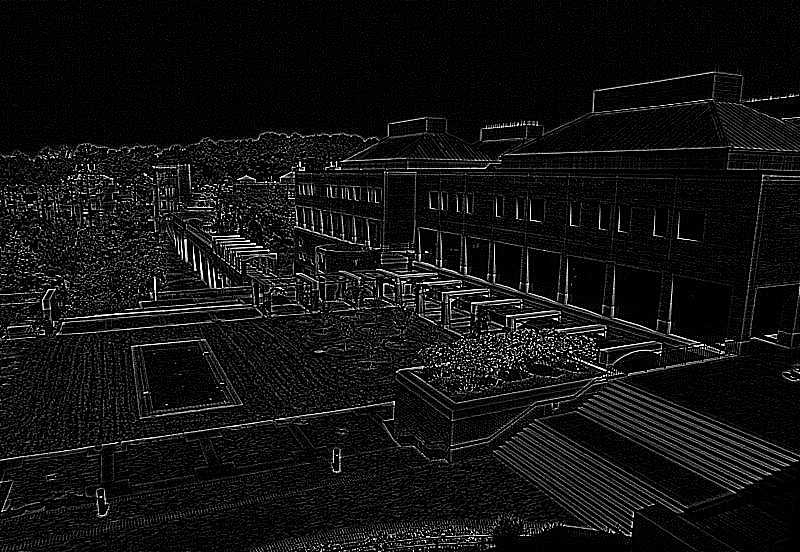

In [ ]:
cv2_imshow(result)

In [ ]:
#Exemplo

img_ex = np.array([[50, 50, 50, 200, 200, 200],   
                   [50, 50, 50, 200, 200, 200],
                   [50, 50, 50, 200, 200, 200],
                   [50, 50, 50, 200, 200, 200],
                   [50, 50, 50, 200, 200, 200],
                   [50, 50, 50, 200, 200, 200]], dtype='uint8')

In [ ]:
result = cv2.filter2D(src=img_ex, ddepth=-1, kernel=kernel_passa_alta)

In [ ]:
result

array([[  0,   0,   0, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0],
       [  0,   0,   0, 255,   0,   0]], dtype=uint8)

In [ ]:
result = cv2.filter2D(src=img_ex, ddepth=-1, kernel=kernel_sharpen)

In [ ]:
result

array([[ 50,  50,   0, 255, 200, 200],
       [ 50,  50,   0, 255, 200, 200],
       [ 50,  50,   0, 255, 200, 200],
       [ 50,  50,   0, 255, 200, 200],
       [ 50,  50,   0, 255, 200, 200],
       [ 50,  50,   0, 255, 200, 200]], dtype=uint8)